# URBAN SPORTS CLUB DATA ANALYSIS

**Tasks for Practical Test:**
What can you say about the data set?
Analyze the data provided. Compile KPI reports such as Cohort Retention, Profit Contribution etc.
Interpret your results and draw conclusions for the business.
Which additional data points would like to look at for better analysis and conclusions? Prioritize them

## Necessary Imports

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline 

## EDA

**Import**

In [2]:
df = pd.read_excel('BI manager test case.xlsx')
df.head()

,Customer ID,country,Product type,full product price,Acquisition_date,Marketing Channel,Subscription Date,Revenue,Cost
0,2.0,Country 1,product_4,39,2015-01-02,Channel 1,2015-01-02,34.3,37.86
1,3.0,Country 1,product_4,39,2015-01-13,Channel 1,2015-01-13,39.0,8.00
2,4.0,Country 1,product_4,39,2015-01-21,Channel 1,2015-01-21,31.2,7.50
3,5.0,Country 1,product_4,39,2015-01-21,Channel 1,2015-01-21,31.2,29.06
4,6.0,Country 1,product_4,39,2015-01-21,Channel 1,2015-01-21,31.2,15.00


**Standardize the variable names**

In [3]:
df.columns

Index(['Customer ID', 'country', 'Product type', 'full product price',
       'Acquisition_date', 'Marketing Channel', 'Subscription Date', 'Revenue',
       'Cost'],
      dtype='object')

In [4]:
df.rename(index=str, columns={
            "Customer ID":"Customer_ID",
            "country": "Country",
            "Product type":"Product_Type",
            "Acquisition_date":"Acquisition_Date",
            "full product price": "Full_Product_Price",
            "Marketing Channel": "Marketing_Channel",
            "Subscription Date": "Subscription_Date"
            },inplace=True)

**Remove duplicates**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29619 entries, 0 to 29618
Data columns (total 9 columns):
Customer_ID           29213 non-null float64
Country               29619 non-null object
Product_Type          29619 non-null object
Full_Product_Price    29619 non-null int64
Acquisition_Date      28191 non-null datetime64[ns]
Marketing_Channel     29619 non-null object
Subscription_Date     28191 non-null datetime64[ns]
Revenue               29619 non-null float64
Cost                  29619 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 29614 entries, 0 to 29618
Data columns (total 9 columns):
Customer_ID           29208 non-null float64
Country               29614 non-null object
Product_Type          29614 non-null object
Full_Product_Price    29614 non-null int64
Acquisition_Date      28190 non-null datetime64[ns]
Marketing_Channel     29614 non-null object
Subscription_Date     28190 non-null datetime64[ns]
Revenue               29614 non-null float64
Cost                  29614 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df.drop_duplicates(inplace=True)

**Null values**

In [8]:
df.isnull().sum()

Customer_ID            406
Country                  0
Product_Type             0
Full_Product_Price       0
Acquisition_Date      1424
Marketing_Channel        0
Subscription_Date     1424
Revenue                  0
Cost                     0
dtype: int64

**Can we save some rows?**

In [9]:
df[df['Customer_ID']==256]

,Customer_ID,Country,Product_Type,Full_Product_Price,Acquisition_Date,Marketing_Channel,Subscription_Date,Revenue,Cost
252,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-03-09,55.20,36.50
9561,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-04-09,55.20,37.50
9562,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-05-09,55.20,30.00
9563,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-06-09,69.00,52.50
9564,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-07-09,69.00,10.00
9565,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-08-09,69.00,27.00
9566,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-09-09,69.00,38.00
9567,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-10-09,26.07,25.22
9568,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-11-09,41.21,40.51
9569,256.0,Country 1,product_1,89,2015-03-09,Channel 1,2015-12-09,70.51,61.12


**Drop rows with missing values**

In [10]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 28190 entries, 0 to 28190
Data columns (total 9 columns):
Customer_ID           28190 non-null float64
Country               28190 non-null object
Product_Type          28190 non-null object
Full_Product_Price    28190 non-null int64
Acquisition_Date      28190 non-null datetime64[ns]
Marketing_Channel     28190 non-null object
Subscription_Date     28190 non-null datetime64[ns]
Revenue               28190 non-null float64
Cost                  28190 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 2.2+ MB


In [11]:
df.dropna(inplace=True)

In [12]:
df['Acquisition_Date'] = pd.to_datetime(df['Acquisition_Date'])
df['Subscription_Date'] = pd.to_datetime(df['Subscription_Date'])

**Create a new variable - Profit**

In [13]:
df['Profit'] = df['Revenue'] - df['Cost'] 
df['Year'] = df['Subscription_Date'].dt.year
df['Month'] = df['Subscription_Date'].dt.month

**Print Final Data frame**

In [14]:
df.head()

,Customer_ID,Country,Product_Type,Full_Product_Price,Acquisition_Date,Marketing_Channel,Subscription_Date,Revenue,Cost,Profit,Year,Month
0,2.0,Country 1,product_4,39,2015-01-02,Channel 1,2015-01-02,34.3,37.86,-3.56,2015,1
1,3.0,Country 1,product_4,39,2015-01-13,Channel 1,2015-01-13,39.0,8.00,31.00,2015,1
2,4.0,Country 1,product_4,39,2015-01-21,Channel 1,2015-01-21,31.2,7.50,23.70,2015,1
3,5.0,Country 1,product_4,39,2015-01-21,Channel 1,2015-01-21,31.2,29.06,2.14,2015,1
4,6.0,Country 1,product_4,39,2015-01-21,Channel 1,2015-01-21,31.2,15.00,16.20,2015,1


**Exploration**

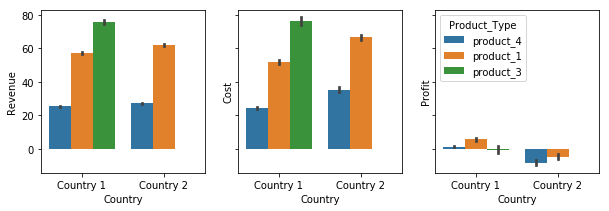

In [15]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize= (10,3))
sns.barplot(x='Country', y='Revenue', data=df, hue='Product_Type', ax= ax1)
sns.barplot(x='Country', y='Cost', data=df, hue='Product_Type', ax= ax2)
sns.barplot(x='Country', y='Profit', data=df, hue='Product_Type', ax= ax3)
ax1.legend_.remove()
ax2.legend_.remove()

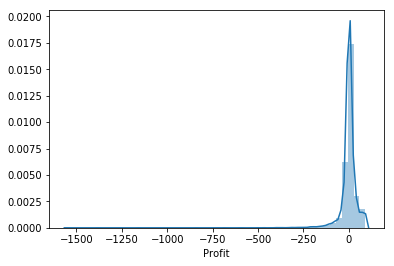

In [16]:
sns.distplot(df['Profit'])

There is no big difference between the revenue variable and the cost. 
The 3rd plot and distribution plot confirm it to us showing many negative average profit values. 
The 3rd product is not sold in Country 2 and only the product 1 is generating some profit. 

Let's now dig a bit more! 

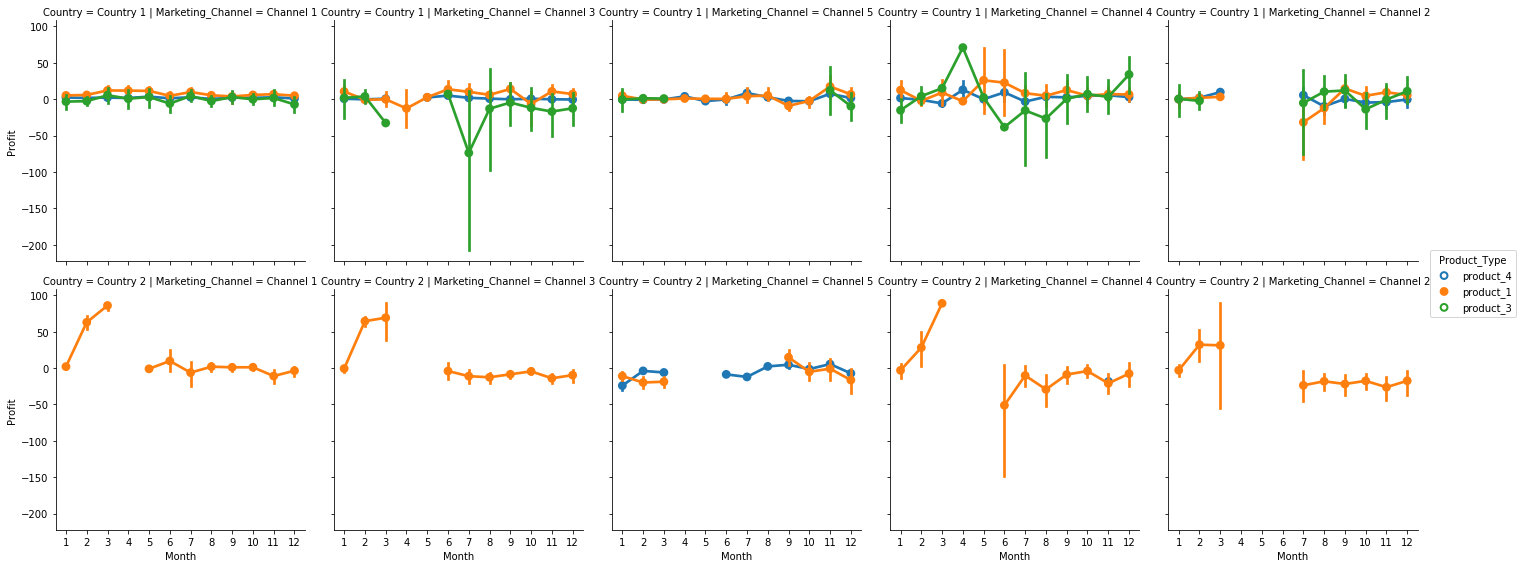

In [17]:
sns.factorplot(data = df, x = 'Month', y = "Profit", 
               col = 'Marketing_Channel',               
               hue = 'Product_Type',
               row = 'Country')

In [18]:
pd.DataFrame(df.groupby(['Country','Product_Type','Marketing_Channel'])['Profit'].mean()).head()

Profit
Country   Product_Type Marketing_Channel          
Country 1 product_1    Channel 1          6.910475
                       Channel 2          3.991284
                       Channel 3          5.881584
                       Channel 4          6.927568
                       Channel 5          1.358240

As said most of the profit in the country 1 is generated by the product 1, however some marketing channels are performing better than other. In my selection I have the channels 1,3 and 4.

CPS(Cost per Subscription)//
Channel 1:44 euros,
Channel 3:27 euros,
Channel 4:45 euros,

This below plot is filtering the main data frame by selecting the year 2016. By visualizing the data with the dashboard I realized a continuous profit level in feburary. What's the reason?

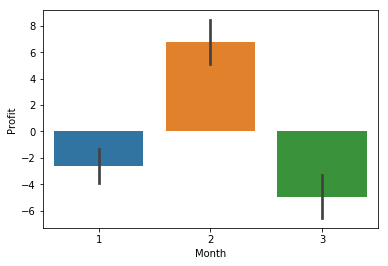

In [19]:
df2016 = df[df['Year']==2016]
sns.barplot(x='Month', y='Profit', data= df2016)

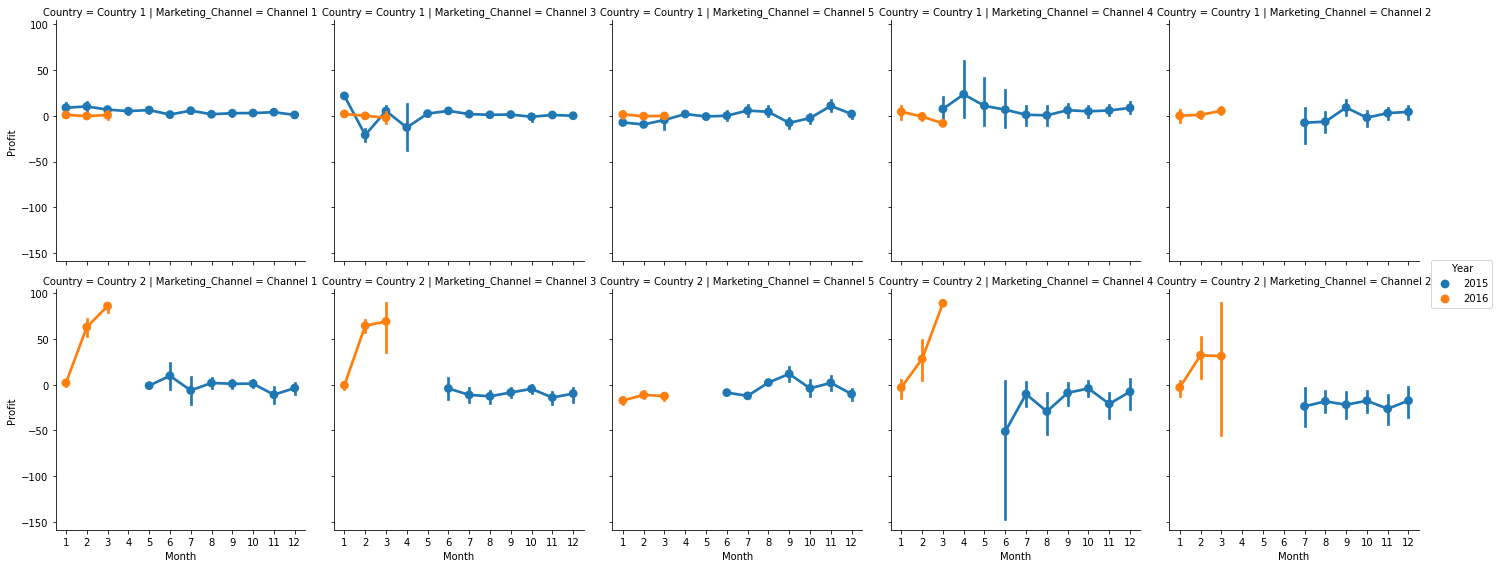

In [20]:
sns.factorplot(data = df, x = 'Month', y = "Profit", 
               col = 'Marketing_Channel',               
               hue = 'Year',
               row = 'Country')

In [21]:
pd.DataFrame(df.groupby(['Country','Year','Month','Marketing_Channel'])['Profit'].mean()).head()

Profit
Country   Year Month Marketing_Channel           
Country 1 2015 1     Channel 1           8.978345
                     Channel 3          21.820000
                     Channel 5          -7.200000
               2     Channel 1          10.305319
                     Channel 3         -20.810000

February was exceptionally good thanks to Country 2 having a profit 6 to 8 times higher than Country 1. 
Ex: in February 2016, Country 2  with the channel 1 had an average profit of 62 euros per subscription against 10 euros for country1.

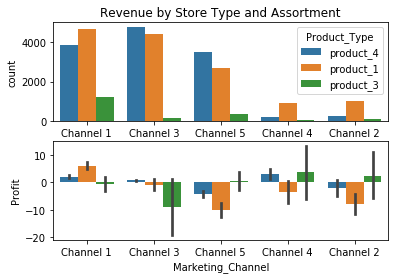

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.figure(figsize = (16,8))
sns.countplot(x='Marketing_Channel',data=df, hue='Product_Type',ax=ax1).set_title('Revenue by Store Type and Assortment')
sns.barplot(x='Marketing_Channel', y='Profit', data=df, hue='Product_Type',ax=ax2)
ax2.legend_.remove()

In a global level, the channel 1 as a better profit/unit sold ratio!
Channel number 3 is not bad in terms of subscription count but the profit generated by the product 3 is the lowest one.
Channels such as 4 and 2 are more adapted to sell product 3.

## ANALYSIS

**Retention Rate/ Cohort Analysis**

In [23]:
dff = pd.read_csv('df_main.csv')

In [24]:
#aggregate users by cohort group
df['Acquisition_Date_2'] = df['Acquisition_Date'].dt.to_period('M')
df['Subscription_Date_2'] = df['Subscription_Date'].dt.to_period('M') 

grouped = dff.groupby(['Acquisition_Date_2', 'Subscription_Date_2','Country'])
grouped_1=grouped
# count the unique users, per Group + Period
cohorts = grouped.agg({'Customer_ID': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'Customer_ID': 'TotalUsers'}, inplace=True)


In [25]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [26]:
cohorts = cohorts.groupby(['Acquisition_Date_2','Country']).apply(cohort_period)
cohorts.head()

TotalUsers  CohortPeriod
Acquisition_Date_2 Subscription_Date_2 Country                            
2015-01            2015-01             All             141.0             1
                                       Country 1       141.0             1
                   2015-02             All             111.0             2
                                       Country 1       111.0             2
                   2015-03             All             141.0             3

In [27]:
#Label the CohortPeriod for each CohortGroup
def retentionbycountryheat (df,country_name,newtablename ="hey"):
        """
        Creates an country specific retention rate heatmap

        """
        newtablename = df.xs(country_name,level='Country').reset_index()

        newtablename.set_index(['Acquisition_Date_2', 'CohortPeriod'], inplace=True)
        # create a Series holding the total size of each CohortGroup
        cohort_group_size = newtablename['TotalUsers'].groupby(level=0).first()
        newtablename['TotalUsers'].unstack(0)
        newtablename  = newtablename['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
        #plot creation
        fig, ax = plt.subplots(figsize=(11,6))   
        sns.heatmap(newtablename.T, mask=newtablename.T.isnull(),annot=True, fmt='.0%')
        plt.title("Retention rate (%) "+ country_name + " per CohortGroup", fontsize=10, fontweight='bold')
        plt.show()

In [28]:
def retentionbycountry (df,country_name,newtablename ="hey"):
        """
        Creates an country specific retention line plot: average retention rate troughtout periods.

        """
        newtablename = df.xs(country_name,level='Country').reset_index()

        newtablename.set_index(['Acquisition_Date_2', 'CohortPeriod'], inplace=True)
        # create a Series holding the total size of each CohortGroup
        cohort_group_size = newtablename['TotalUsers'].groupby(level=0).first()
        newtablename['TotalUsers'].unstack(0)
        newtablename  = newtablename['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
        #plot creation
        newtablename.T.mean().plot(figsize=(11,6), marker='s')
        plt.title("Retention rate (%) "+ country_name + " per CohortGroup", fontsize=10, fontweight='bold')
        plt.show()

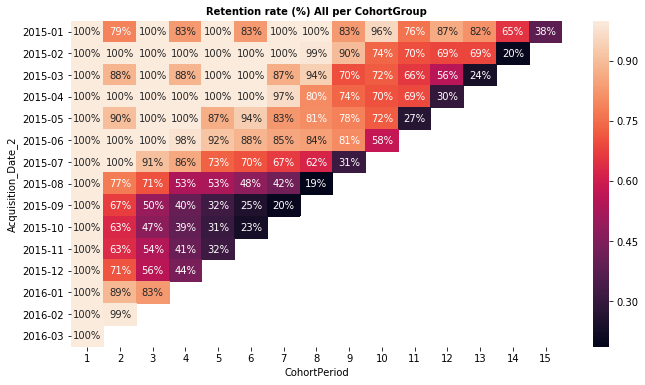

In [29]:
retentionbycountryheat(cohorts,'All')

The retention rate is good. Dropping from September and the during the winter, don't have enough data to notice a potential seasonality.
This is something happening from a cohort group to another. How to overcome this? Is there a type of sport, partners that could compensate for the loss?

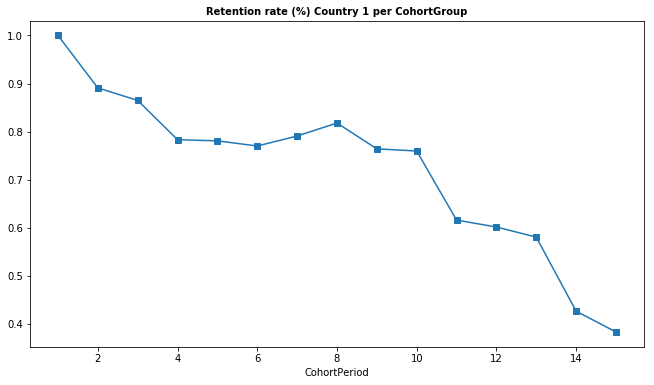

In [30]:
retentionbycountry(cohorts,'Country 1')

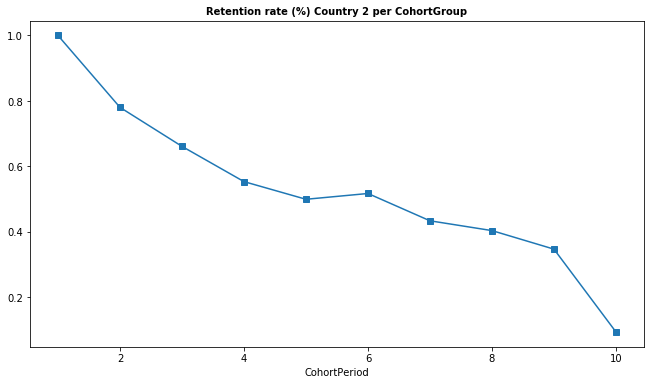

In [31]:
retentionbycountry(cohorts,'Country 2')

On top of the heat map the line plot gives us a general idea and easier comparison between countries. 
The country 1 is more stable than the country 2.
You shouldn't worry about the line dropping because not all countries got to the last periods and it's also impacted by winter times.

**RFM (Recency, Frequency, Monetary) analysis **(Customer segmentation)

Segments analyses the past purchase behavior to divide customers into groups.


RECENCY (R): Days since last purchase
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money this customer spent

In [32]:
dff['InvoiceNo']=dff['Unnamed: 0']

In [33]:
dff['Subscription_Date'] = pd.to_datetime(dff['Subscription_Date'])

In [34]:
#creating the rfm matrix for each user
import datetime as dt
NOW = dt.datetime(2016,4,1)

In [35]:
rfmTable = dff.groupby(['Customer_ID','Country']).agg({'Subscription_Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Full_Product_Price': lambda x: x.sum()})
rfmTable['Subscription_Date'] = rfmTable['Subscription_Date'].astype(int)
rfmTable.rename(columns={'Subscription_Date': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Full_Product_Price': 'monetary_value'}, inplace=True)


In [36]:
rfmTable.head()

recency  frequency  monetary_value
Customer_ID Country                                      
2.0         All             59         14             546
            Country 1       59         14             546
3.0         All             48         14             546
            Country 1       48         14             546
4.0         All             12         15             585

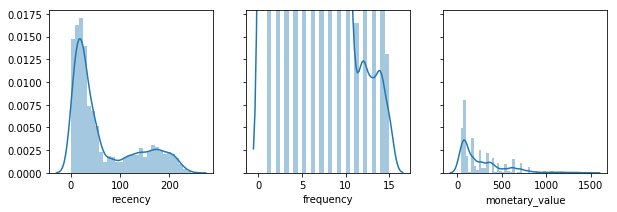

In [37]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize= (10,3))
sns.distplot(rfmTable['recency'],ax=ax1)
sns.distplot(rfmTable['frequency'],ax=ax2)
sns.distplot(rfmTable['monetary_value'],ax=ax3)

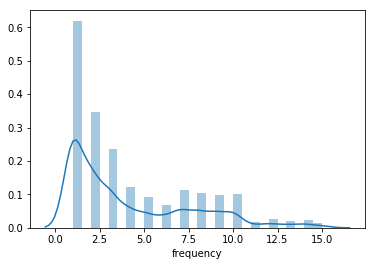

In [38]:
sns.distplot(rfmTable['frequency'])

In [39]:
#split the metrics into segments by using quartiles
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
segmented_rfm = rfmTable

In [40]:
#tag segments
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [41]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

recency  frequency  monetary_value  r_quartile  \
Customer_ID Country                                                     
2.0         All             59         14             546           3   
            Country 1       59         14             546           3   
3.0         All             48         14             546           3   
            Country 1       48         14             546           3   
4.0         All             12         15             585           1   

                       f_quartile  m_quartile  
Customer_ID Country                            
2.0         All                 1           1  
            Country 1           1           1  
3.0         All                 1           1  
            Country 1           1           1  
4.0         All                 1           1

In [42]:
#Add a new column to combine RFM score
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

recency  frequency  monetary_value  r_quartile  \
Customer_ID Country                                                     
2.0         All             59         14             546           3   
            Country 1       59         14             546           3   
3.0         All             48         14             546           3   
            Country 1       48         14             546           3   
4.0         All             12         15             585           1   

                       f_quartile  m_quartile RFMScore  
Customer_ID Country                                     
2.0         All                 1           1      311  
            Country 1           1           1      311  
3.0         All                 1           1      311  
            Country 1           1           1      311  
4.0         All                 1           1      111

In [43]:
def tag_category(df):
    if df['RFMScore'] == '111':
        return 'Best Customers'
    elif df['RFMScore'] == '311':
        return 'Almost Lost'
    elif df['RFMScore'] == '411':
        return 'Lost Customers'
    elif df['RFMScore'] == '444':
        return 'Lost Cheap Customers'
    elif df['f_quartile'] == 1:
        return 'Loyal Customers'
    elif df['m_quartile'] ==1:
        return 'Big Spenders'
    else:
        return 'Other'

In [44]:
segmented_rfm2 = segmented_rfm.copy()
segmented_rfm2['Category'] = segmented_rfm2.apply(tag_category,axis=1)

In [45]:
aa = segmented_rfm2.xs('All',level='Country').reset_index()

In [46]:
lii = aa[aa['RFMScore']=='111'].sort_values('monetary_value', ascending=False)['Customer_ID'].tolist()
aa[aa['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head()

,Customer_ID,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Category
127,129.0,2,15,1485,1,1,1,111,Best Customers
18,20.0,12,15,1485,1,1,1,111,Best Customers
89,91.0,9,15,1485,1,1,1,111,Best Customers
76,78.0,11,15,1485,1,1,1,111,Best Customers
21,23.0,12,15,1485,1,1,1,111,Best Customers


 - **Best Customers (111):** Bought most recently and most often and spend the most
 **Action:** No price incentives, new products, and loyalty programs
 - **Loyal Customers (X1X):** Buy most frequently
**Action:** Use R and M to further segment
 - **Big spenders (XX1):** Spend the most
**Action:** Market your most expensive products
 - **Almost Lost (311):** Haven't purchased for some time, but purchased frequently and spend the most
**Action:** Aggressive price incentives
 - **Lost Customers (411):** Haven't purchased for some time, but purchased frequently and spend the most
**Action:** Aggressive price incentives
 - **Lost Cheap Customers (444):** Last purchased long ago, purchased few and spent little
**Action:** Don't spend too much trying to re-acquire


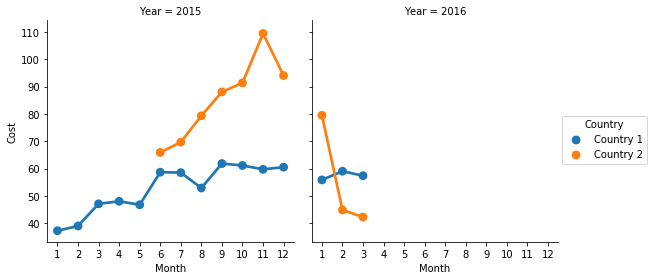

In [47]:
lii = aa[aa['RFMScore']=='111'].sort_values('monetary_value', ascending=False)['Customer_ID'].tolist()
qq = df[df['Customer_ID'].isin(lii)][['Month','Year','Cost','Country']].reset_index()
qq = qq.groupby(['Country','Month','Year'])['Cost'].mean().reset_index()
sns.factorplot(data = qq, x = 'Month', y = "Cost", 
               col = 'Year',               
               hue= 'Country')

Here we are analyzing if the cost has been decreased for our best customers, as suggested above!

In [48]:
ee = df[df['Customer_ID'].isin(lii)]
ee = ee[ee['Month']==3]
print('We are talking about ' + str(ee['Cost'].sum())+'€ that could have been spent somewhere else in March 2016.')

We are talking about 14758.44€ that could have been spent somewhere else in March 2016.


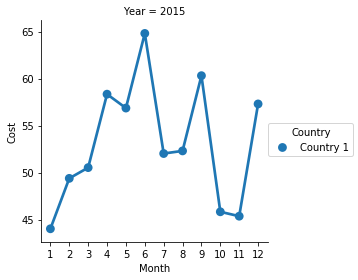

In [49]:
luu = aa[aa['RFMScore']=='411'].sort_values('monetary_value', ascending=False)['Customer_ID'].tolist()
qq = df[df['Customer_ID'].isin(luu)][['Month','Year','Cost','Country']].reset_index()
qq = qq.groupby(['Country','Month','Year'])['Cost'].mean().reset_index()
sns.factorplot(data = qq, x = 'Month', y = "Cost", 
               col = 'Year',               
               hue= 'Country')

However the price costs are higher to get back lost customers.

**Conclusion:**

- Profits are low (left-skewed distribution)
- Product 1 is the one generating most of the profit in country 1
- 2016 was exceptionally a good performing month:
    - Country number 2 first performance during this time of the year (Avg profit by Subscription *6)
- Globally Channel 1 has the best profit, but it can depend on the country and product, for example:
    - To sell the product 3 in country 1, channel 4 and 2 are better suited (for + profit).
- Customer retention is good, drops significantly in autumn/winter, how to overcome it?
- There is a customer segmentation possible to allocate budget in a better way.

## Additional Data

- Customer demographic, location 
- Partner info
- Traffic

**Visit the Dashboard by clicking [here](https://my-usc-app.herokuapp.com/)!**